[View in Colaboratory](https://colab.research.google.com/github/hsarena/dl-rnn/blob/master/keras_simple_rnn.ipynb)

In [0]:
import keras
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Input, SimpleRNN, LSTM, GRU
from keras.optimizers import Adam
from keras.initializers import RandomNormal
from keras.models import load_model

In [0]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [0]:
num_classes = 10
nb_units = 50
seq_length = 28
feature_size = 28

Normalize Data

In [0]:
x_train = x_train/np.max(x_train)
x_test = x_test/np.max(x_train)                           

Change data representation to One Hot 

In [0]:
y_train = keras.utils.to_categorical(y_train,num_classes)
y_test = keras.utils.to_categorical(y_test,num_classes)

Define Model

In [0]:
model = Sequential()
model.add( GRU( nb_units,input_shape=(seq_length,feature_size)))
model.add( Dense(10,activation='relu'))

Compile Model

In [0]:
loss=keras.losses.categorical_crossentropy

In [0]:
model.compile(optimizer='adam',loss=loss,metrics=['accuracy'])

In [49]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 50)                11850     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                510       
Total params: 12,360
Trainable params: 12,360
Non-trainable params: 0
_________________________________________________________________


In [52]:
epochs = 3
# Complete following line, using  batch_size=128 is suggested.
history = model.fit(x_train, y_train,
          batch_size=128,
          epochs=epochs,
          verbose=1 )

Epoch 1/3
60000/60000 [==============================] - 13s 221us/step - loss: 1.5308 - acc: 0.5424
Epoch 2/3
60000/60000 [==============================] - 14s 226us/step - loss: 1.4285 - acc: 0.5919
Epoch 3/3
27776/60000 [============>.................] - ETA: 7s - loss: 1.3651 - acc: 0.6058

60000/60000 [==============================] - 13s 218us/step - loss: 1.3431 - acc: 0.6252


Text(0.5,1,'accuracy')

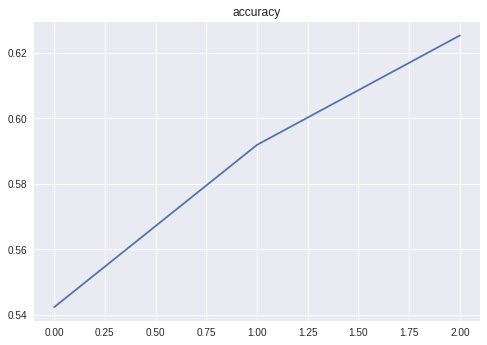

In [53]:

plt.plot(history.epoch,history.history['acc'])
plt.title('accuracy')

Text(0.5,1,'loss')

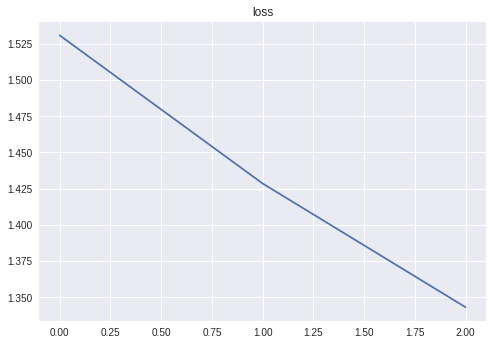

In [54]:
plt.plot(history.epoch,history.history['loss'])
plt.title('loss')


In [55]:
scores = model.evaluate(x_test,y_test,verbose=1)

print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

10000/10000 [==============================] - 1s 130us/step
acc: 65.43%
